<a href="https://colab.research.google.com/github/Ps1231/Data-Science-Tutotial-Using-Python/blob/main/Neural%20Networks/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7: Neural Networks

In Python, you can use the scikit-learn library for neural networks and the pyrenn library to visualize the neural network plot. Make sure to install these libraries before proceeding:

```BASH
pip install scikit-learn
pip install pyrenn
```




In [2]:
!pip install pyrenn


  Preparing metadata (setup.py) ... done
  Created wheel for pyrenn: filename=pyrenn-0.1-py3-none-any.whl size=9237 sha256=c814f0d8b070a0ad8aea02245b87feebc9be36883a07654ae5b83706407e1233
  Stored in directory: /root/.cache/pip/wheels/88/73/cf/52f87ad9ea9e987087f5c2b03c8d33e837693325a2e0305736
Successfully built pyrenn


## 7.1 Demonstrate application of NEURAL NETWORKS using Python

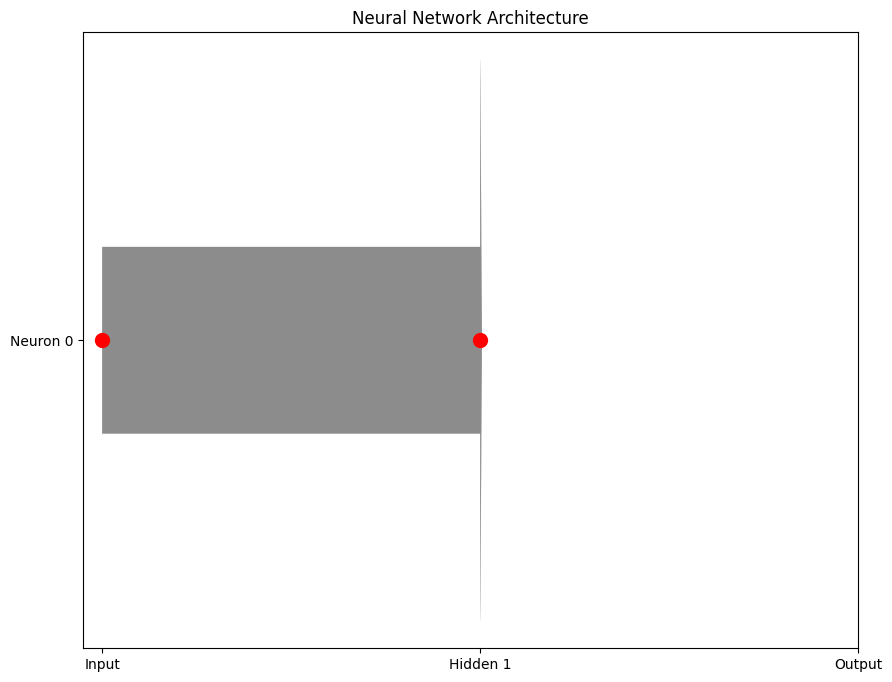

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import pyrenn

# Load the dataset (replace 'bank.csv' with the actual path to your dataset)
bank_data = pd.read_csv('/content/bank.csv')

# Convert binary and ordinal variables to factors
bank_data['deposit'] = bank_data['deposit'].map({'yes': 1, 'no': 0})
bank_data['marital'] = pd.Categorical(bank_data['marital'])
bank_data['education'] = pd.Categorical(bank_data['education'])
bank_data['default'] = pd.Categorical(bank_data['default'])
bank_data['housing'] = pd.Categorical(bank_data['housing'])
bank_data['loan'] = pd.Categorical(bank_data['loan'])
bank_data['contact'] = pd.Categorical(bank_data['contact'])
bank_data['month'] = pd.Categorical(bank_data['month'])
bank_data['poutcome'] = pd.Categorical(bank_data['poutcome'])

# Perform min-max standardization on the Age variable
bank_data['age_mm'] = (bank_data['age'] - bank_data['age'].min()) / (bank_data['age'].max() - bank_data['age'].min())

# Select relevant columns
selected_columns = ["deposit", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "age_mm"]

# Create a DataFrame with selected columns
fram_train = bank_data[selected_columns]

# Convert categorical variables to dummy variables
fram_train = pd.get_dummies(fram_train, columns=["marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"])

# Split the data into predictor variables (X) and the target variable (y)
X = fram_train.drop("deposit", axis=1)
y = fram_train["deposit"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the predictor variables
X_scaled = scaler.fit_transform(X)

# Run the neural network algorithm
nnet01 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000)
nnet01.fit(X_scaled, y)

# Plot the neural network
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained the neural network (nnet01) using MLPClassifier

# Extract weights and biases from the trained neural network
weights = [coef.T for coef in nnet01.coefs_]
biases = nnet01.intercepts_

# Create a plot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw edges (connections) between neurons
for layer in range(1, len(weights)):
    for i in range(len(weights[layer - 1])):
        for j in range(len(weights[layer][0])):
            # Limit alpha value to be within 0 to 1
            alpha_value = min(max(abs(weights[layer - 1][i, j]), 0), 1)
            ax.arrow(layer - 1, i, 1, j - i, color='black', linewidth=0.1, alpha=alpha_value)

# Draw nodes (neurons)
for layer in range(len(biases)):
    for i in range(len(biases[layer])):
        ax.scatter(layer, i, color='red', s=100)

# Set labels and title
ax.set_xticks(np.arange(len(weights) + 1))
ax.set_xticklabels(['Input'] + [f'Hidden {i}' for i in range(1, len(weights))] + ['Output'])
ax.set_yticks(np.arange(max([len(bias) for bias in biases])))
ax.set_yticklabels([f'Neuron {i}' for i in range(max([len(bias) for bias in biases]))])
ax.set_title('Neural Network Architecture')

plt.show()
